# <center><u> Support Vector Machines</u></center>

- Very popular and widely used supervised learning classification algorithm
- The great benefit: it can operates even in infinite dimension
- SVM finds a hyperplane or decision surface or (line) that leads to a homogeneous partition of data
- A good separation is achieved by the hyperplane that has largest distance to the nearest training data points of any class
- so we have to maximize the margin
- performs classification by finding the hyperplane that maximize the margin between two classes

![](_pic/img-SupportVectorMachines/svm1.png)
**Goal is:**
classifiy the data points by finding the straight line ( or hyper-plane ) that differentiate the two classes with **maximum margin**
Hyperplane might be this...
![](_pic/img-SupportVectorMachines/svm2.png)
![](_pic/img-SupportVectorMachines/svm3.png)
![](_pic/img-SupportVectorMachines/svm4.png)

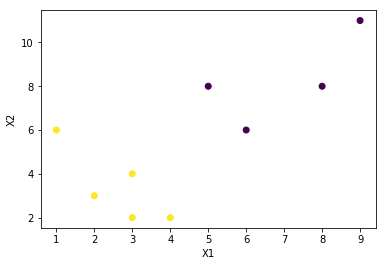

In [2]:
#How to find hyperplane when problem is linearly separable
import numpy as np
import matplotlib.pyplot as plt
x1=[1,2,5,4,3,8,3,9,6]
x2 =[6,3,8,2,4,8,2,11,6]
y=[1,1,0,1,1,0,1,0,0]
plt.scatter(x1,x2,c=y)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

- Here a line easily separate these data points so hyperplane is a line

<center style="font-size:160%;">$clf = SVC(C=1.0,kernel= 'linear')$</center>

and line:

<center style="font-size:120%;">$mX+b$</center>
<center style="font-size:120%;">or</center>
<center style="font-size:120%;">$wX+b$</center>
here w or m is weight of feature x

- if we have 2 features then line:
<center style="font-size:120%;">$m_1X_1+m_2X_2+b$</center>
<center>or</center>
<center style="font-size:120%;">$w_1X_1+w_2X_2+b$</center>
- similarly for n features
<center style="font-size:120%;">$m_1X_1+m_2X_2+………..m_nX_n+ b$</center>
<center>or</center>
<center style="font-size:120%;">$w_1X_1+w_2X_2+……+w_nX_n +b$</center>

OR
## <center>$\vec{w}*\vec{x}+b$</center>
If we have 2 classes then
## <center>$\vec{w}*\vec{x}+b\geq+1$</center>
testing data points to class 1
And,
## <center>$\vec{w}*\vec{x}+b\leq-1$</center>
 more $precisely < -1$  testing data points to class 0
Role of C parameter:
![](img/img-SupportVectorMachines/svm5.PNG)
Role of C parameter:
![](img/img-SupportVectorMachines/svm6.PNG)

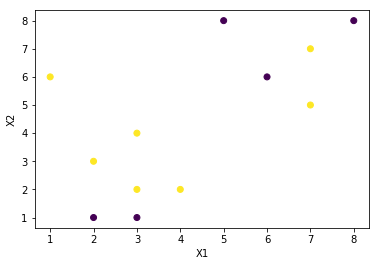

In [6]:
#How to find hyperplane when problem is non-linearly separable
import numpy as np
import matplotlib.pyplot as plt
x1=[1,2,5,4,3,8,3,2,6,3,7,7]
x2 =[6,3,8,2,4,8,2,1,6,1,7,5]
y=[1,1,0,1,1,0,1,0,0,0,1,1]
plt.scatter(x1,x2,c=y)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

clf = SVC(kernel='rbf') // (Radial basis function)

**In this case value of y is given by:**

Exp<center>$-gamma*\sqrt{(x_1-x_2)^2)}+b$</center>

Now classification is done on the basis of

Exp<center>$-gamma*\sqrt{(x_1-x_2)^2)}+b \geq0 $    class 1</center>
And
Exp<center>$-gamma*\sqrt{(x_1-x_2)^2)}+b <0$    class 0</center>

**Role of gamma parameter in RBF:**

This shows that as gamma increases, the algorithm tries harder to avoid misclassifying training data, which leads to overfitting.

i.e.
- higher value of gamma ………..overfittting
- lesser value of gamma………….underfitting

In [2]:
# example of SVC that generates a FutureWarning
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
# prepare dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2)
# create and configure model
model = SVC()
# fit model
model.fit(X, y)

D:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

**FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.**

### create and configure model
**model = SVC(gamma='auto')**

**model = SVC(gamma='scale')**

In [ ]:
import numpy as np
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()

data = iris
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

**train_test_split**

from sklearn.model_selection import train_test_split
from sklearn import svm

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

**cross_val_score**

from sklearn.model_selection import cross_val_score
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, iris.data, iris.target, cv=5)
scores

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

from sklearn import metrics
scores = cross_val_score(clf, iris.data, iris.target, cv=5, scoring='f1_macro')
scores  

**ShuffleSplit**

 from sklearn.model_selection import ShuffleSplit
n_samples = iris.data.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(clf, iris.data, iris.target, cv=cv)

**Manuals**

def custom_cv_2folds(X):
     n = X.shape[0]
     i = 1
     while i <= 2:
         idx = np.arange(n * (i - 1) / 2, n * i / 2, dtype=int)
         yield idx, idx
         i += 1
        
custom_cv = custom_cv_2folds(iris.data)
cross_val_score(clf, iris.data, iris.target, cv=custom_cv)